In [ ]:
# -*- coding : utf-8 -*-

#!/usr/bin/env python
__author__ = "Ronil Patil"
__license__ = "Feel free to copy."

"""
Created on Mon Nov 15 21:11:06 2021

@author : Ronil Patil
Dataset from : https://www.kaggle.com/arjuntejaswi/plant-village
"""

In [ ]:
# It will delete unzip folder
!rm -rf Potato

# <center>**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

# <center>**UNZIPING THE DATASET FILE**

In [ ]:
!unzip '/content/drive/MyDrive/Potato Leaf Disease Project/Potato.zip'

Archive:  /content/drive/MyDrive/Potato Leaf Disease Project/Potato.zip
   creating: Potato/Test/
   creating: Potato/Test/Potato___Early_blight/
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7

# <center>**CREATING SOME REQUIRED STATIC VARIABLES**

In [ ]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [ ]:
# preprocessing training images

# train_images = []
# train_labels = []
# train_data_dir = 'Potato/Train'
# train_data_dir = train_data_dir + '/*'

# for directory_path in glob.glob(train_data_dir) :   
#     label = directory_path.split('/')[-1]

#     for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :    
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)    # read color image 
#         img = cv2.resize(img, (SIZE, SIZE))        # resize the image
#         train_images.append(img)
#         train_labels.append(label)

# train_data = list(zip(train_images, train_labels))
# random.seed(SEED_TRAINING)   
# random.shuffle(train_data)
# train_images, train_labels = zip(*train_data)

# train_images = np.array(train_images)
# # train_images = train_images / 255.0

In [ ]:
# preprocessing testing images.

# test_images = []
# test_labels = []
# test_data_dir = 'Potato/Test'
# test_data_dir = test_data_dir + '/*'

# for directory_path in glob.glob(test_data_dir) :   
#     label = directory_path.split('/')[-1]

#     for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :    
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)    # read color image 
#         img = cv2.resize(img, (SIZE, SIZE))        # resize the image
#         test_images.append(img)
#         test_labels.append(label)

# test_data = list(zip(test_images, test_labels))
# random.seed(SEED_TRAINING)   
# random.shuffle(test_data)
# test_images, test_labels = zip(*test_data)

# test_images = np.array(test_images)
# # test_images = test_images / 255.0

In [ ]:
# preprocessing validation images

# valid_images = []
# valid_labels = []
# valid_data_dir = 'Potato/Valid'
# valid_data_dir = valid_data_dir + '/*'

# for directory_path in glob.glob(valid_data_dir) :   
#     label = directory_path.split('/')[-1]

#     for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :    
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)    # read color image 
#         img = cv2.resize(img, (SIZE, SIZE))        # resize the image
#         valid_images.append(img)
#         valid_labels.append(label)

# valid_data = list(zip(valid_images, valid_labels))
# random.seed(SEED_TRAINING)   
# random.shuffle(valid_data)
# valid_images, valid_labels = zip(*valid_data)

# valid_images = np.array(valid_images)
# # valid_images = valid_images / 255.0

In [ ]:
# printing basic details of training, testing and validation dataset.

# print('Training data details : ')
# print('Shape of train images : ', train_images.shape)
# print('Labels of train images : ', len(train_labels))
# print()
# print('Testing data details : ')
# print('Shape of train images : ', test_images.shape)
# print('Labels of train images : ', len(test_labels))
# print()
# print('Validation data details : ')
# print('Shape of train images : ', valid_images.shape)
# print('Labels of train images : ', len(valid_labels))

# <center>**PERFORMING DATA AUGMENTATION ON DATASET**

In [ ]:
# this is the augmentation configuration, we will use it for training
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

# this is the augmentation configuration, we will use it for validation:
# only rescaling. But you can try other operations
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        directory = '/content/Potato/Train/',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb",
        shuffle = True,
        seed = 65) 

validation_generator = validation_datagen.flow_from_directory(
        '/content/Potato/Valid/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb",
        shuffle = True,
        seed = 76)

test_generator = test_datagen.flow_from_directory(
        '/content/Potato/Test/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
        shuffle = False,
        seed = 42)

In [ ]:
# le = preprocessing.LabelEncoder()
# y_train = le.fit_transform(train_labels)
# y_test = le.fit_transform(test_labels)
# y_valid = le.fit_transform(valid_labels)

# labels = dict(zip(le.classes_,range(len(le.classes_))))
# print(labels)

In [ ]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_valid = to_categorical(y_valid)

# <center>**CREATING CONVOLUTIONAL NEURAL NETWORK ARCHITECTURE**

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        # keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [ ]:
print(train_generator.n)   # here .n will return no. of images used by generators 
print(validation_generator.n)

900
300


In [ ]:
print(train_generator.batch_size)     # .batch_size will return the batch size
print(validation_generator.batch_size)

16
16


# <center>**TRAINING CONVOLUTIONAL NEURAL NETWORK MODEL**

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
56/56 [==============================] - 48s 292ms/step - loss: 1.0971 - accuracy: 0.3722 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 2/50
56/56 [==============================] - 16s 289ms/step - loss: 0.8321 - accuracy: 0.5814 - val_loss: 0.9480 - val_accuracy: 0.4583
Epoch 3/50
56/56 [==============================] - 16s 286ms/step - loss: 0.5448 - accuracy: 0.7624 - val_loss: 0.7455 - val_accuracy: 0.6875
Epoch 4/50
56/56 [==============================] - 16s 284ms/step - loss: 0.3838 - accuracy: 0.8439 - val_loss: 0.3295 - val_accuracy: 0.8507
Epoch 5/50
56/56 [==============================] - 16s 286ms/step - loss: 0.2817 - accuracy: 0.8846 - val_loss: 0.4292 - val_accuracy: 0.8333
Epoch 6/50
56/56 [==============================] - 16s 285ms/step - loss: 0.2935 - accuracy: 0.8824 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 7/50
56/56 [==============================] - 16s 285ms/step - loss: 0.2430 - accuracy: 0.9027 - val_loss: 0.3093 - val_accuracy: 0.8819

# <center>**CHECKING MODEL PERFORMANCE**

In [ ]:
# score = model.evaluate_generator(test_generator)
score = model.evaluate_generator(test_generator)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test loss :  0.10339429974555969
Test accuracy :  0.9733333587646484


# <center>**CREATING PLOT FOR TESTING MODEL ACCURACY AND VALIDATION LOSS**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

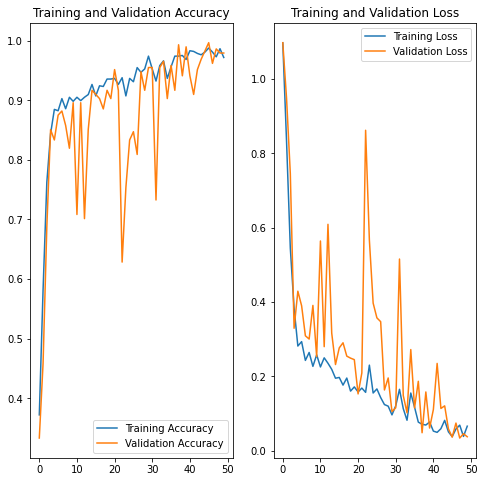

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# <center>**SAVING DEEP LEARNING MODEL**

In [ ]:
# it will save the model
# model.save('final_model1.h5')

# <center>**FUNCTION TO GET MODEL'S PREDICTED CLASS AND CONFIDENCE**

In [ ]:
# def predict(model, img) :
#     # img_array = tf.keras.preprocessing.image.img_to_array(img)
#     # img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence

# <center>**TESTING MODEL PERFORMANCE**

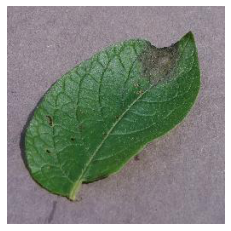

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  98.12 %
_____________________________________________________________


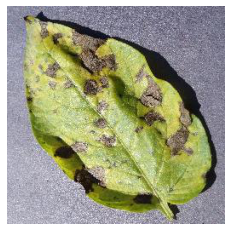

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  99.99 %
_____________________________________________________________


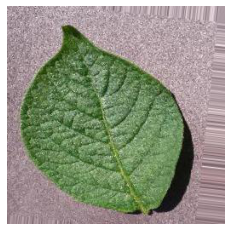

Predicted Class :  Potato___healthy
Actual Class :  Potato___healthy
Confidence :  100.0 %
_____________________________________________________________


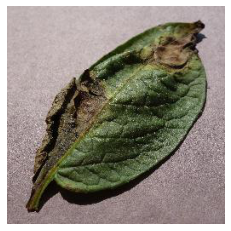

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  99.68 %
_____________________________________________________________


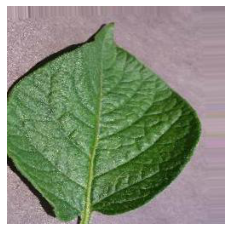

Predicted Class :  Potato___healthy
Actual Class :  Potato___healthy
Confidence :  99.99 %
_____________________________________________________________


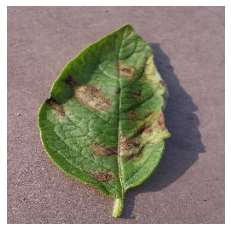

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  94.1 %
_____________________________________________________________


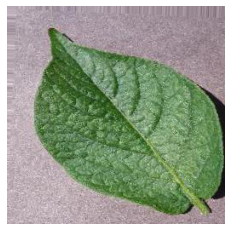

Predicted Class :  Potato___healthy
Actual Class :  Potato___healthy
Confidence :  99.7 %
_____________________________________________________________


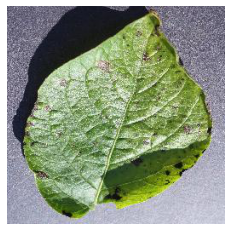

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  87.56 %
_____________________________________________________________


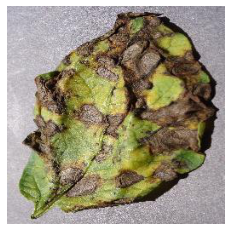

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  99.99 %
_____________________________________________________________


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show = False) :
    img = image.load_img(img_path, target_size = (256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis = 0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show :
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

def get_labels(test_path) : 
    # getting class labels
    from glob import glob

    class_names = []
    test_path = test_path + '/*'
    for i in glob(test_path) :  # Reads all the folders in which images are present
        class_names.append(i.split('/')[-1])

    # return dict(zip(class_names, range(len(class_names))))    # return dictionary containing class name and numeric label.
    return sorted(class_names)

if __name__ == "__main__":
    # load model
    model = load_model("/content/drive/MyDrive/Potato Leaf Disease Project/final_model.h5", compile = False)

    # image path
    img1 = '/content/Potato/Test/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG'   
    img2 = '/content/Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c___RS_Early.B 6738.JPG'
    img3 = '/content/Potato/Test/Potato___healthy/Potato_healthy-28-_0_8545.JPG'
    img4 = '/content/Potato/Test/Potato___Late_blight/815516f8-6fb1-4f92-bdff-63349e5ee83f___RS_LB 3237.JPG'
    img5 = '/content/Potato/Test/Potato___healthy/Potato_healthy-35-_0_3642.JPG'
    img6 = '/content/Potato/Test/Potato___Late_blight/9631fd8f-244c-4047-98e4-aecc907624c1___RS_LB 4573.JPG'
    img7 = '/content/Potato/Test/Potato___healthy/Potato_healthy-30-_0_7912.JPG'
    img8 = '/content/Potato/Test/Potato___Early_blight/9125d133-5b86-4363-8fbe-79c813ac8795___RS_Early.B 6748.JPG'
    img9 = '/content/Potato/Test/Potato___Early_blight/9846eead-9fc1-4c35-8b63-1adfbdf0b118___RS_Early.B 8325.JPG'
    
    class_names = get_labels('/content/Potato/Test')
    for i in [img1, img2, img3, img4, img5, img6, img7, img8, img9] : 
        new_image = load_image(i, show = True)
        y_proba = model.predict(new_image)
        confidence = round(100 * (np.max(y_proba[0])), 2)
        print('Predicted Class : ', class_names[np.argmax(y_proba)])
        print('Actual Class : ', i.split('/')[-2])
        print('Confidence : ', confidence, '%')
        print('_____________________________________________________________')
